# Análise Regressão Logística
### Base de dados: Mental Health and Technology Usage
#### Grupo: Marcos Rodrigues, Raphael Alcantara, Luis Felipe Nogueira, Victor Nogueira

## Variáveis: 

- User_ID: Código do respondente
- Age: Idade do respondente
- Gender: Genêro (Female, Male, Other)
- Tecnology_Usage_Hours: Uso de tecnologia diária em horas por dia
- Gaming_Hours: Tempo em horas de "gameplay" por dia
- Screen_Time_Hours: Tempo em horas de uso de tela por dia
- Mental_Health_Status: Status da saúde mental (Excellent, Good, Fair, Poor)
- Stress_Level: Nível de estresse (Medium, Low, High)
- Sleep_Hours: Tempo de sono em horas por dia
- Physical_Activity_Hours: Tempo de atividade física em horas por dia
- Support_Systems_Access: Se há acesso à sistemas de suporte (Yes, No)
- Work_Environment_Impact: Impacto envolvido no ambiente de trabalho (Negative, Neutral, Positive)
- Online_Support_Usage: Uso de suporte online (Yes, No

#### Esse conjunto de dados oferece insights sobre como o uso diário da tecnologia, incluindo mídias sociais e tempo de tela, afeta a saúde mental. Ele captura vários padrões comportamentais e suas correlações com indicadores de saúde mental, como níveis de estresse, qualidade do sono e produtividade.

Esta etapa tem como objetivo aplicar um modelo de regressão logística para investigar possíveis associações entre variáveis comportamentais, demográficas e contextuais com o status de saúde mental dos respondentes. A variável dependente Mental_Health_Status foi recodificada em formato binário, sendo 1 para a categoria "Poor" e 0 para as demais ("Fair", "Good" e "Excellent"). As variáveis independentes consideradas incluem idade, gênero, uso de tecnologia, tempo de sono, atividade física, nível de estresse, impacto do ambiente de trabalho, acesso a suporte social e outras relacionadas ao comportamento digital.

A regressão logística permite avaliar a influência dessas variáveis na probabilidade de um indivíduo apresentar um status de saúde mental classificado como "Poor", fornecendo uma estrutura adequada para analisar dados categóricos com múltiplos preditores.

Grupo: Marcos Rodrigues, Raphael Alcantara, Luis Felipe Nogueira, Victor Nogueira

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, mutual_info_classif

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Importando e observando os dados

In [ ]:
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')

In [ ]:
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

In [ ]:
df.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


### Regressão Logística

##### Variável dependente

A variável dependente Mental_Health_Status foi recodificada em formato binário

- 0 == "Poor"
- 1 == ("Fair", "Good" e "Excellent")

In [ ]:
# Se houver mais de duas categorias, binarizar
# Aqui vamos considerar 'Poor' como 1 (problema) e o resto como 0
df['Mental_Health_Status_num'] = df['Mental_Health_Status'].apply(lambda x: 1 if x == 'Poor' else 0)

In [ ]:
df['Work_Environment_Impact'].value_counts()

Work_Environment_Impact
Negative    3378
Neutral     3312
Positive    3310
Name: count, dtype: int64

In [ ]:
df['Support_Systems_Access'].value_counts()

Support_Systems_Access
No     5006
Yes    4994
Name: count, dtype: int64

In [ ]:
df['Mental_Health_Status_num'].value_counts()

Mental_Health_Status_num
0    7516
1    2484
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

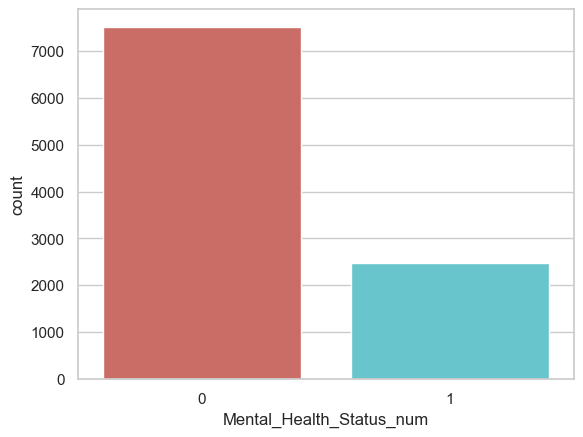

In [ ]:
sns.countplot(x='Mental_Health_Status_num', data=df, palette='hls')
plt.show

In [ ]:
count_no = len(df[df['Mental_Health_Status_num']==0])
count_yes = len(df[df['Mental_Health_Status_num']==1])
pct_no = count_no/(count_no+count_yes)
print("Percentual de Respondentes Sem Acesso a Suporte: ", pct_no*100)
pct_yes = count_yes/(count_no+count_yes)
print("Percentual de Respondentes Com Acesso a Suporte: ", pct_yes*100)

Percentual de Respondentes Sem Acesso a Suporte:  75.16000000000001
Percentual de Respondentes Com Acesso a Suporte:  24.84


A amostra está desbalanceada, pode ser que aconteça de gerar uma tendência na formação da etapa final do método. A proporção é de 75,16 para 24,84.

### Análise das variáveis não métricas

Neste bloco, estão expostas as frequências de respostas e gráficos que mostram o cruzamento de algumas das variáveis não-métricas, compostas por: Mental_Health_Status, Stress_Level, Support_Systems_Access e Social_Media_Usage_Hours

#### Mental Health Status


In [ ]:
df.groupby('Mental_Health_Status').count()['User_ID']

Mental_Health_Status
Excellent    2518
Fair         2490
Good         2508
Poor         2484
Name: User_ID, dtype: int64

In [ ]:
df.groupby('Stress_Level').count()['User_ID']

Stress_Level
High      3330
Low       3332
Medium    3338
Name: User_ID, dtype: int64

Text(0, 0.5, 'Proporção de Respondentes')

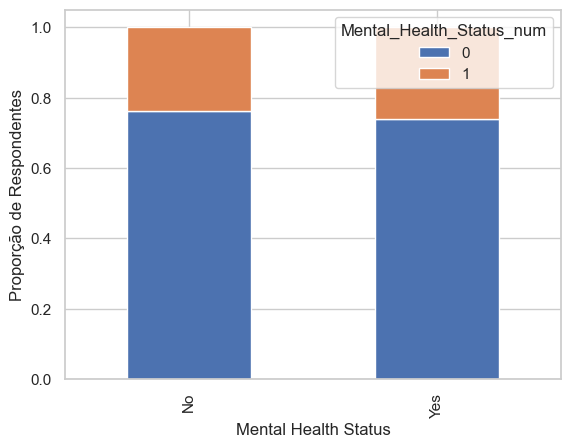

In [ ]:
table=pd.crosstab(df.Support_Systems_Access,df.Mental_Health_Status_num)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Mental Health Status')
plt.ylabel('Proporção de Respondentes')

Text(0, 0.5, 'Respondentes')

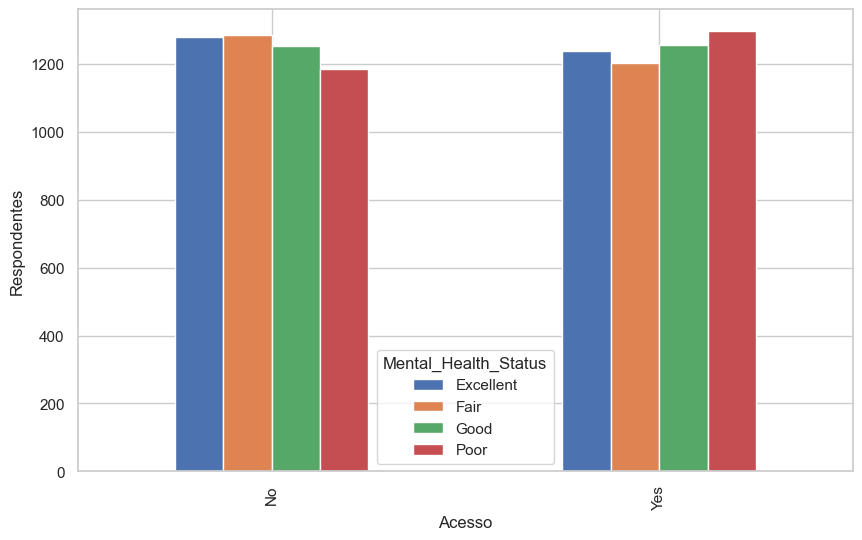

In [ ]:
pd.crosstab(df.Support_Systems_Access,df.Mental_Health_Status).plot(kind='bar',figsize=(10, 6))
plt.xlabel('Acesso')
plt.ylabel('Respondentes')


Text(0, 0.5, 'Proporção de Respondentes')

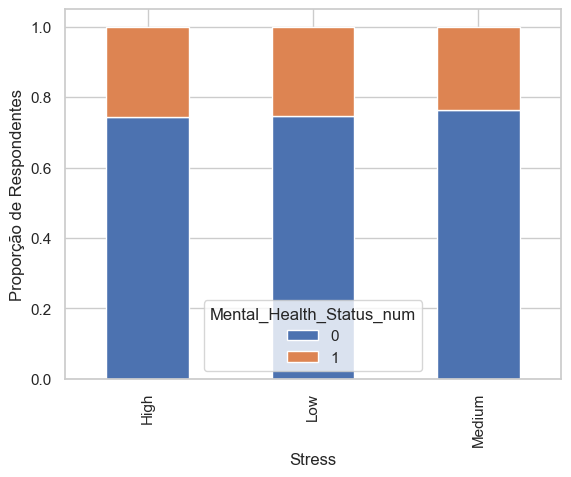

In [ ]:
table=pd.crosstab(df.Stress_Level,df.Mental_Health_Status_num)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Stress')
plt.ylabel('Proporção de Respondentes')

Text(0, 0.5, 'Proporção de Respondentes')

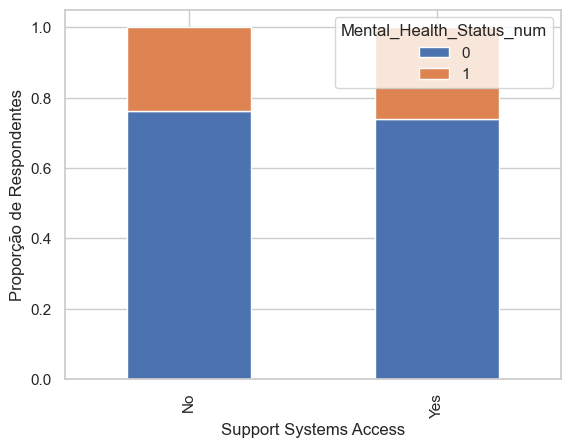

In [ ]:
table=pd.crosstab(df.Support_Systems_Access,df.Mental_Health_Status_num)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Support Systems Access')
plt.ylabel('Proporção de Respondentes')

Text(0, 0.5, 'Frequencia')

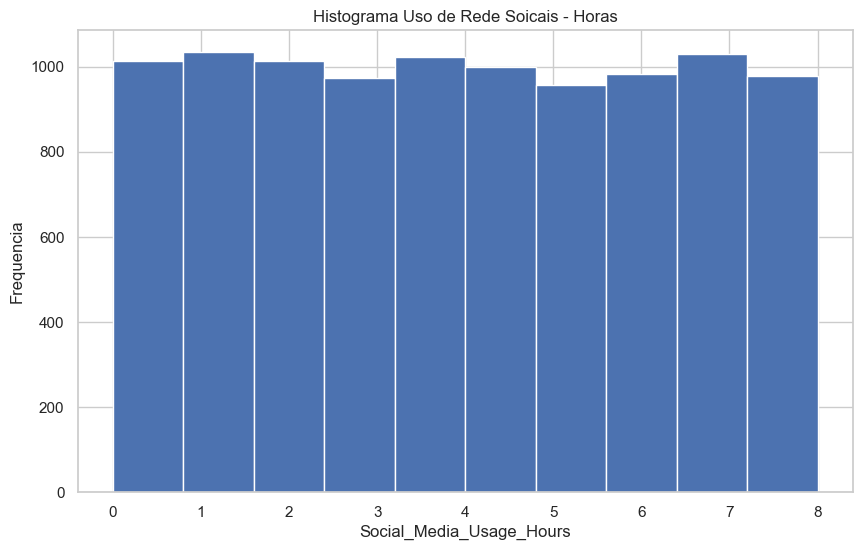

In [ ]:
df.Social_Media_Usage_Hours.hist(figsize=(10, 6))
plt.title('Histograma Uso de Rede Soicais - Horas')
plt.xlabel('Social_Media_Usage_Hours')
plt.ylabel('Frequencia')

### Criação das Variáveis Dummy

Aqui nós "convertemos" variáveis categóricas para variáveis Dummy, com isso, conseguiremos utilizar elas dentro da lógica de regressão logística.

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Mental_Health_Status_num
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,0
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,1
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No,0


In [ ]:
cat_vars=['Gender', 'Mental_Health_Status', 'Stress_Level', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['Gender', 'Mental_Health_Status', 'Stress_Level', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
df.head(3)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Mental_Health_Status_num,Gender_Female,Gender_Male,Gender_Other,Mental_Health_Status_Excellent,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_No,Support_Systems_Access_Yes,Work_Environment_Impact_Negative,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_No,Online_Support_Usage_Yes
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,0,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,1,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True,True,False
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No,0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False


In [ ]:
df1=df[to_keep]
df1.columns.values

array(['User_ID', 'Age', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Sleep_Hours', 'Physical_Activity_Hours',
       'Mental_Health_Status_num', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Mental_Health_Status_Excellent',
       'Mental_Health_Status_Fair', 'Mental_Health_Status_Good',
       'Mental_Health_Status_Poor', 'Stress_Level_High',
       'Stress_Level_Low', 'Stress_Level_Medium',
       'Support_Systems_Access_No', 'Support_Systems_Access_Yes',
       'Work_Environment_Impact_Negative',
       'Work_Environment_Impact_Neutral',
       'Work_Environment_Impact_Positive', 'Online_Support_Usage_No',
       'Online_Support_Usage_Yes'], dtype=object)

In [ ]:
df1.head(3)

,User_ID,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Mental_Health_Status_num,Gender_Female,Gender_Male,Gender_Other,Mental_Health_Status_Excellent,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_No,Support_Systems_Access_Yes,Work_Environment_Impact_Negative,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_No,Online_Support_Usage_Yes
0,USER-00001,23,6.57,6.00,0.68,12.36,8.01,6.71,0,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True
1,USER-00002,21,3.01,2.57,3.74,7.61,7.28,5.88,1,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True,True,False
2,USER-00003,51,3.04,6.14,1.26,3.16,8.04,9.81,0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False


In [ ]:
# Data Frame a ser utilizado com todas as variáveis
df2 = df1

### Seleção das variáveis independentes e divisão entre amostra treino e teste

Aqui será definido a partição da nossa base em duas amostras, o tamanho da amostra de teste será de 40% e da amostra de treino será de 60%.<br>

OBS: Aqui rodamos com todas as variáveis primeiro e então tivemos a conclusão de quais utilizar.

In [ ]:
X = df1.loc[:, ['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Physical_Activity_Hours']]
y = df1.loc[:, df1.columns == 'Mental_Health_Status_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Ao analisarmos os valores p, descobrimos que as variáveis significantes são:
- Technology_Usage_Hours
- Social_Media_Usage_Hours
- Gaming_Hours
- Physical_Activity_Hours

In [ ]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

C:\Users\marco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Seletor de variável automatico método KBest:
selector = SelectKBest(score_func=mutual_info_classif, k='all') 
selector.fit(X_train, y_train['Mental_Health_Status_num'])

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000014A119D0360>)

In [ ]:
# Ver os scores KBest
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(scores.sort_values(by='Score', ascending=False))

                    Feature     Score
0    Technology_Usage_Hours  0.001738
2              Gaming_Hours  0.001074
1  Social_Media_Usage_Hours  0.000000
3   Physical_Activity_Hours  0.000000


Com esse método, vimos que as melhores variáveis (score maior que 0,005) (critério de informação mútua)
São:
- Technology_Usage_Hours
- Gaming_Hours
- Sleep_Hours

In [ ]:
# Coeficientes das variáveis
coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coef.sort_values(by='Coefficient', key=abs, ascending=False))

                    Feature  Coefficient
2              Gaming_Hours     0.021002
0    Technology_Usage_Hours     0.017822
1  Social_Media_Usage_Hours     0.012795
3   Physical_Activity_Hours     0.008974


Aqui conseguimos ver que as variáveis mais importantes são:
- Social_Media_Usage_Hours
- Gaming_Hours
- Physical_Acivity_Hours

Isso porque o restante tem seus coeficientes muito próximo de 0

In [ ]:
# Valores de Z
logreg.decision_function(X_train)

array([-0.0576084 , -0.05946976, -0.15123735, ...,  0.10790887,
        0.14118068,  0.08728068])

In [ ]:
# Coeficientes - Betas
logreg.coef_

array([[0.01782182, 0.01279486, 0.02100195, 0.00897408]])

In [ ]:
#Valor do intecepto: Beta 0
logreg.intercept_

array([-0.26406135])

Após a utilização do método dos scores Kbest e dos Coeficientes das variáveis para maior entendimento, realizamos a seleção das variáveis pelo método do valor-p, que será demonstrado, logo abaixo na aba Ajuste no modelo.

### Probabilidades
Primeira coluna probabilidade de ser 0. <br>
Segunda coluna prababilidade de ser 1.

In [ ]:
logreg.predict_proba(X_train)

array([[0.51439812, 0.48560188],
       [0.51486306, 0.48513694],
       [0.53773744, 0.46226256],
       ...,
       [0.47304893, 0.52695107],
       [0.46476334, 0.53523666],
       [0.47819367, 0.52180633]])

### Ajuste no modelo
Análise do LL (Log-Liklihood) e R² (Pseudo R-Quadrado).

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.569887
         Iterations 5
                             Results: Logit
Model:              Logit                    Method:           MLE      
Dependent Variable: Mental_Health_Status_num Pseudo R-squared: -0.024   
Date:               2025-04-29 11:42         AIC:              6846.6457
No. Observations:   6000                     BIC:              6873.4437
Df Model:           3                        Log-Likelihood:   -3419.3  
Df Residuals:       5996                     LL-Null:          -3340.7  
Converged:          1.0000                   LLR p-value:      1.0000   
No. Iterations:     5.0000                   Scale:            1.0000   
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Technology_Usage_Hours   -0.0460   0.0079 -5.8007 0

In [ ]:
y_pred = logreg.predict(X_train)
print('Acuracia do modelo do conjunto de Treino: {:.3f}'.format(logreg.score(X_train, y_train)))

Acuracia do modelo do conjunto de Treino: 0.514


In [ ]:
y_train['Mental_Health_Status_pred'] = y_pred

### Ajuste prático no modelo - Amostra de Treino

753 acertos em 1470 - Sensibilidade: 51,22% <br>
2331 acertos em 4530 - Especificidade: 51,46% <br>
Acerto geral do Modelo da Amostra de Treino: 51,4%

In [ ]:
pd.crosstab(y_train['Mental_Health_Status_num'], y_train['Mental_Health_Status_pred'], rownames=['Status'], colnames=['Previsto'], margins=True, margins_name='Total')

Previsto,0,1,Total
Status,,,
0,2331,2199,4530
1,717,753,1470
Total,3048,2952,6000


No ajuste estatístico, observamos que o valor de Pseudo R-squared = -0.024 , junto a observação do Log-Likelihood(indica o valor do -2LL após a aplicação do modelo com as variáveis) = -3419.3 e do LL-Null(indica o valor do -2LL antes da aplicação do modelo com as variáveis) = -3340.7, indica que a base de dados não é estatisticamente indicada para a aplicação da Regressão Logística, visto que, o modelo ajustado se mostra inferior ao nulo(sem a utilização de nenhuma variável) em relação a acertividade das categorias dos casos e o baixíssimo pseudo R-squared mostra quee as variáveis independentes não explicam bem as variáveis dependentes, ou seja, não auxiliam no modelo. 

In [ ]:
y_pred = logreg.predict(X_test)
print('Acuracia do modelo do conjunto de Teste: {:.3f}'.format(logreg.score(X_test, y_test)))

Acuracia do modelo do conjunto de Teste: 0.484


No caso do ajuste prático, a acurácia encontrada é inferior a do caso onde se supõe que os indivíduos pertencem a categoria de maior frequência na base. Logo, conclui-se que o modelo não é adequado a essa base de dados.

### Curva ROC

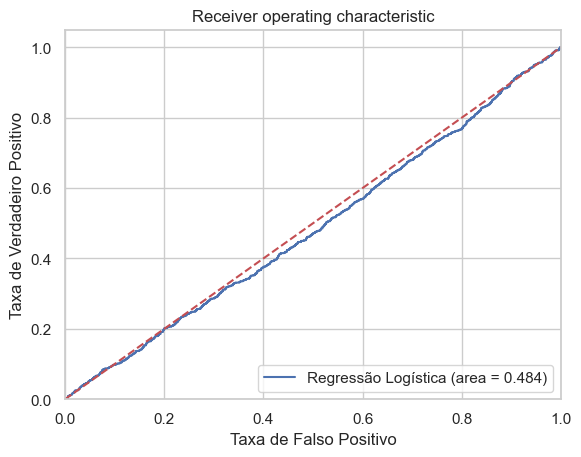

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58      2986
           1       0.24      0.48      0.32      1014

    accuracy                           0.48      4000
   macro avg       0.49      0.48      0.45      4000
weighted avg       0.61      0.48      0.52      4000



In [ ]:
y_test['Mental_Health_Status_pred'] = y_pred

In [ ]:
y_test

,Mental_Health_Status_num,Mental_Health_Status_pred
9394,1,1
898,0,1
2398,0,0
5906,0,0
2343,0,1
...,...,...
4758,0,1
9914,1,1
7067,0,1
4578,0,0


In [ ]:
pd.crosstab(y_test['Mental_Health_Status_num'], y_test['Mental_Health_Status_pred'], rownames=['Status'], colnames=['Previsto'], margins=True, margins_name='Total')

Previsto,0,1,Total
Status,,,
0,1445,1541,2986
1,524,490,1014
Total,1969,2031,4000


A área AUC desenhada na curva ROC é menor no que 0,5, que é o indicado pela diagonal principal do gráfico. Esse comportamento mostra que a acurácia do modelo seria inferior ao mínimo necessário, mesmo com uma amostra completamente balanceada(50%;50%). Portanto, reafirma a baixa adequação da base ao modelo.

### Amostra Total - Treino e Teste

In [ ]:
y_pred = logreg.predict(X)
print('Acuracia do modelo do conjunto Total: {:.2f}'.format(logreg.score(X, y)))

Acuracia do modelo do conjunto Total: 0.50


In [ ]:
df1['Mental_Health_Status_pred'] = y_pred

C:\Users\marco\AppData\Local\Temp\ipykernel_25612\4251467207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mental_Health_Status_pred'] = y_pred


In [ ]:
df1.head()

,User_ID,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Mental_Health_Status_num,Gender_Female,Gender_Male,Gender_Other,Mental_Health_Status_Excellent,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_No,Support_Systems_Access_Yes,Work_Environment_Impact_Negative,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_No,Online_Support_Usage_Yes,Mental_Health_Status_pred
0,USER-00001,23,6.57,6.00,0.68,12.36,8.01,6.71,0,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,1
1,USER-00002,21,3.01,2.57,3.74,7.61,7.28,5.88,1,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True,True,False,0
2,USER-00003,51,3.04,6.14,1.26,3.16,8.04,9.81,0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,0
3,USER-00004,25,3.84,4.48,2.59,13.08,5.62,5.28,0,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,True,0
4,USER-00005,53,1.20,0.56,0.29,12.63,5.55,4.00,0,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,0


In [ ]:
pd.crosstab(df1['Mental_Health_Status_num'], df1['Mental_Health_Status_pred'], rownames=['Estado'], colnames=['Previsto'], margins=True, margins_name='Total')

Previsto,0,1,Total
Estado,,,
0,3776,3740,7516
1,1241,1243,2484
Total,5017,4983,10000


Na amostra total, observamos o comportamento igual a média ponderada entre amostras de treino e teste. Sendo assim, observamos uma acurácia ainda inferior ao mínimo requerido dessa base, cerca de 75%, e, por isso, não se adequa a amostra.

### Considerações Finais


Com base nos resultados obtidos, conclui-se que o modelo de regressão logística aplicado à base de dados não se mostrou adequado, tanto do ponto de vista estatístico quanto prático. Do ponto de vista estatístico, os indicadores de ajuste, como a significância das variáveis, os valores dos coeficientes e as métricas de desempenho (pseudo R², acurácia, curva ROC, -2LL), evidenciaram baixa capacidade preditiva do modelo e ausência de relação consistente entre as variáveis independentes e a variável dependente. Já no aspecto prático, mesmo que algumas variáveis tenham apresentado associação estatística, o modelo não foi capaz de fornecer previsões confiáveis ou interpretações úteis que contribuam para a tomada de decisão ou para o entendimento mais claro do fenômeno estudado. Dessa forma, a regressão logística, nas condições testadas, não se mostrou uma ferramenta apropriada para representar adequadamente os dados desta pesquisa.